In [1]:
import pandas as pd

df=pd.read_csv('drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [4]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [5]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [6]:
label_encoders={}
for column in ['Sex', 'BP', 'Cholesterol','Drug']:
    le=LabelEncoder()
    df[column]=le.fit_transform(df[column])
    label_encoders[column]=le

In [15]:
X= df.drop('Drug', axis=1)
Y=df['Drug']

X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.3,random_state=0)

In [16]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [17]:
#decision tree

from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(X_train,Y_train)
dt_pred=dt.predict(X_test)
dt_accuracy=accuracy_score(Y_test,dt_pred)

In [18]:
print(f'accuracy:{dt_accuracy*100:.2f}')
print(classification_report(Y_test,dt_pred))

accuracy:100.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00        18
           4       1.00      1.00      1.00        30

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



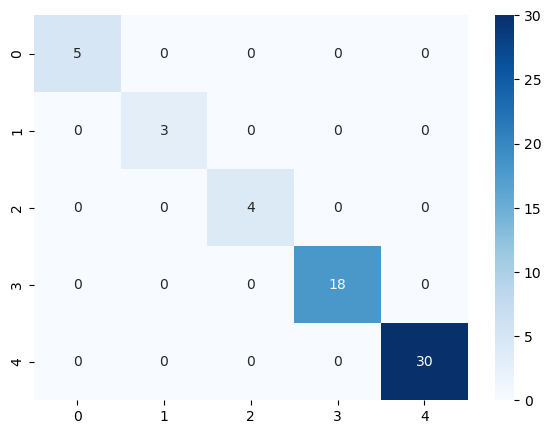

In [22]:
#confusion matrix

plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(Y_test,dt_pred),annot=True,fmt='d',cmap='Blues')
plt.show()